In [22]:

import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter


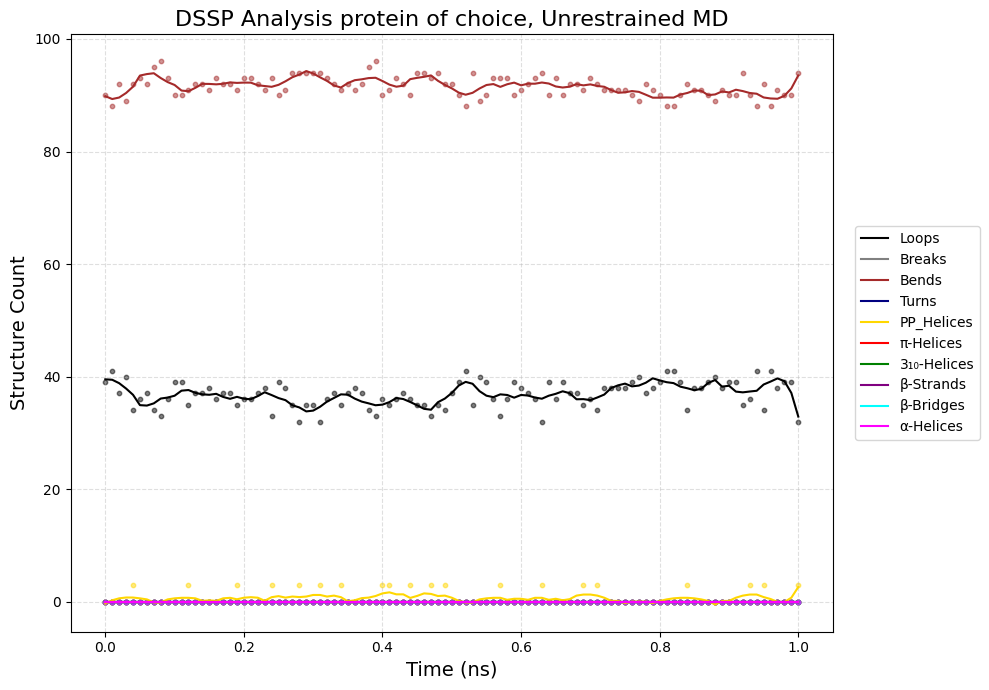

In [23]:
file_path = "/Users/samirabaghbanbari/samira/code/data/dssp_num.xvg"

# Parse XVG file
data = []
with open(file_path, "r") as f:
    for line in f:
        if line.startswith(("#", "@")):
            continue
        parts = line.strip().split()
        if len(parts) == 11:  # time + 10 series
            data.append([float(x) for x in parts])

# Convert to DataFrame
cols = ["Time_ns", "Loops", "Breaks", "Bends", "Turns",
        "PP_Helices", "π-Helices", "3₁₀-Helices",
        "β-Strands", "β-Bridges", "α-Helices"]

df = pd.DataFrame(data, columns=cols)

# Colors for each structure type
colors = {
    "Loops": "black",
    "Breaks": "gray",
    "Bends": "brown",
    "Turns": "navy",
    "PP_Helices": "gold",
    "π-Helices": "red",
    "3₁₀-Helices": "green",
    "β-Strands": "purple",
    "β-Bridges": "cyan",
    "α-Helices": "magenta"
}

# Plot
plt.figure(figsize=(10,7))

for col in cols[1:]:
    
    plt.scatter(df["Time_ns"], df[col], s=10, color=colors[col], alpha=0.5)
    # smoothed trend
    try:
        smooth = savgol_filter(df[col], window_length=10, polyorder=3)
        plt.plot(df["Time_ns"], smooth, color=colors[col], linewidth=1.5, label=col)
    except:
        plt.plot(df["Time_ns"], df[col], color=colors[col], linewidth=1.5, label=col)

plt.xlabel("Time (ns)", fontsize=14)
plt.ylabel("Structure Count", fontsize=14)
plt.title("DSSP Analysis protein of choice, Unrestrained MD", fontsize=16)

plt.legend(loc="center left", bbox_to_anchor=(1.02, 0.5), fontsize=10)
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()

# plt.savefig("dssp_analysis.png", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:
df